# Voter System Proposal Simulation

Joshua Sanz, Robert Wang, Victor Han

In [1]:
# a bit of setup
import networkx as nx
import numpy as np
import math
import matplotlib.pyplot as plt
from matplotlib import animation
import pandas as pd
import scipy.stats as stats


%load_ext autoreload
%autoreload 2

%matplotlib inline

In [2]:
from VoterModel import VoterModel
from graphs import *

In [3]:
N = 10
er = erdos_renyi(N, 0.5)
#er = complete_graph(Nn)
#er = cycle(N)
# er = torus_2d(10,5)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


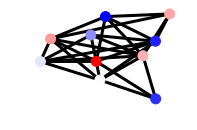

In [4]:
options = {
    'node_color': np.random.rand(N),
    'node_size': 100,
    'width': 3,
    'cmap': 'bwr'
}
plt.subplot(221)
nx.draw(er, **options)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


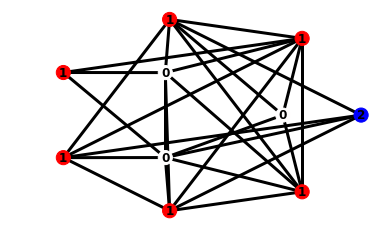

In [160]:
# vm = VoterModel(graph = er, voting='simple', visualization='shell')
# vm = VoterModel(graph = er, voting='probability', visualization='shell')
vm = VoterModel(graph=er, voting='weighted_prob', visualization='shell',
                handicap_b1=1.0, handicap_b2=0.0)
vm.initialize('all_rand')
vm.draw()

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


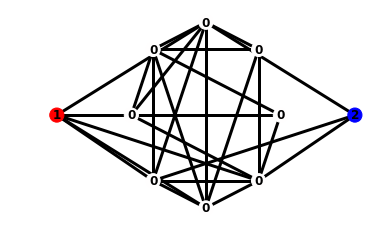

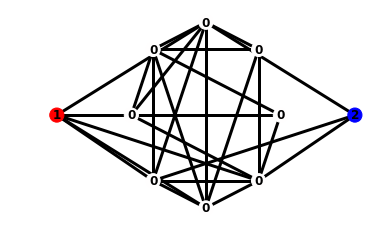

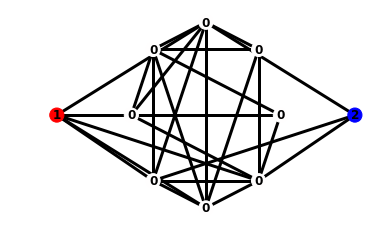

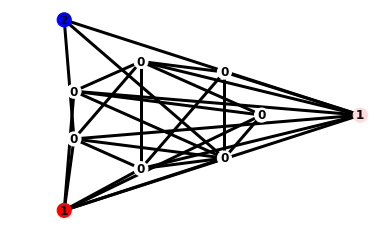

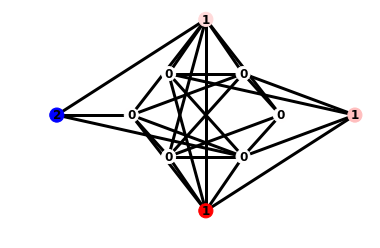

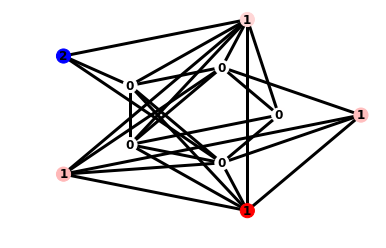

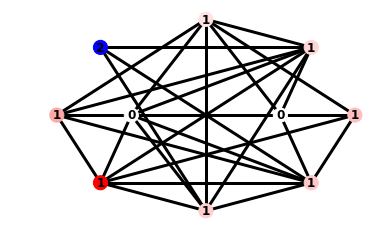

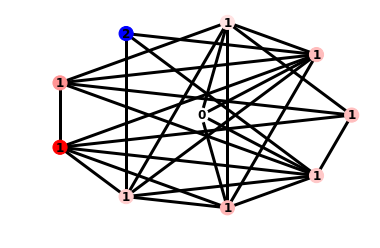

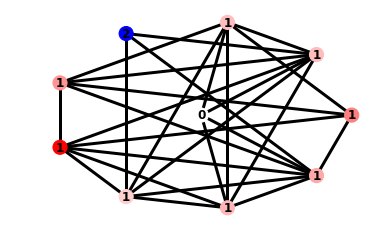

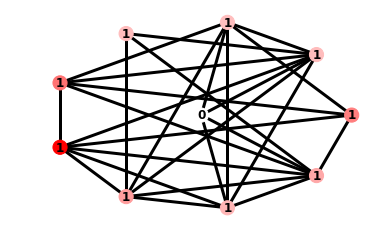

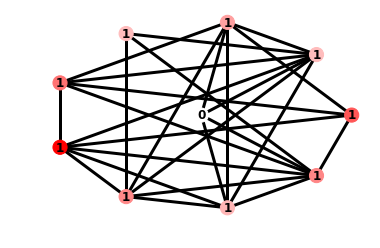

In [161]:
vm.initialize('rand_pair')
vm.draw()
plt.show()
for i in range(10):
    vm.update()
    vm.draw()
    plt.show()

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


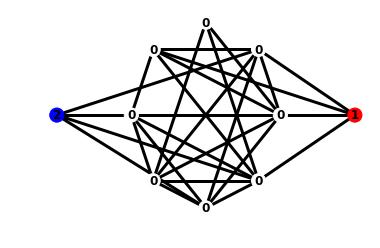

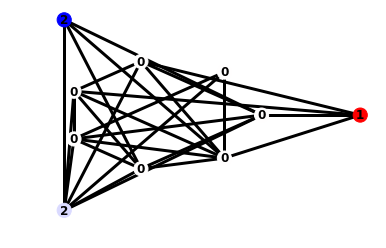

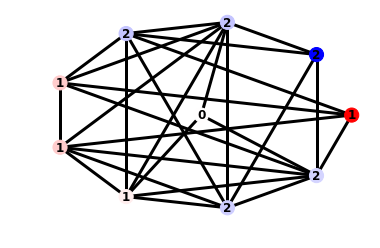

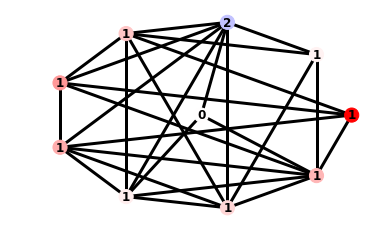

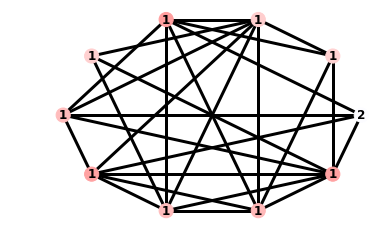

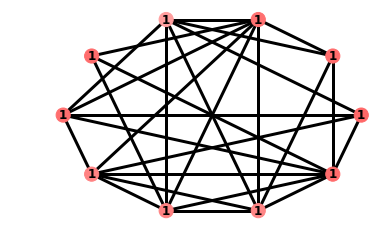

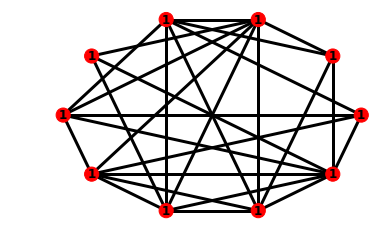

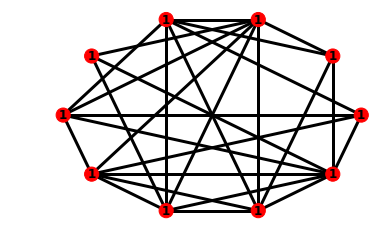

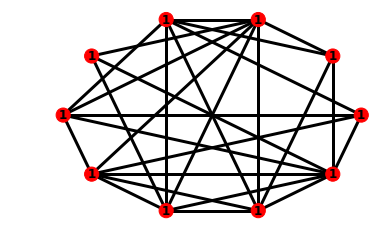

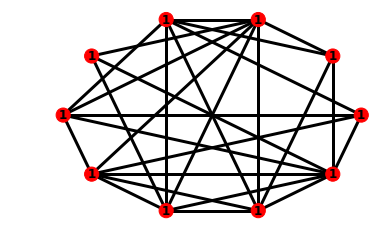

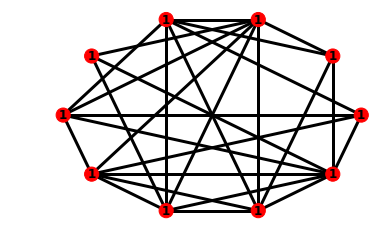

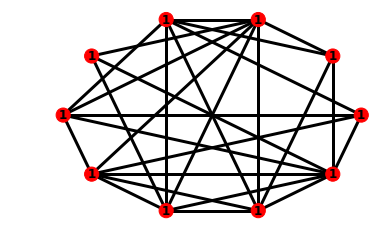

In [159]:
vm.initialize('rand_pair')
vm.draw()
plt.show()
for i in range(50):
    vm.update()
    if i % 5 == 0:
        vm.draw()
        plt.show()
vm.draw()
plt.show()